### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


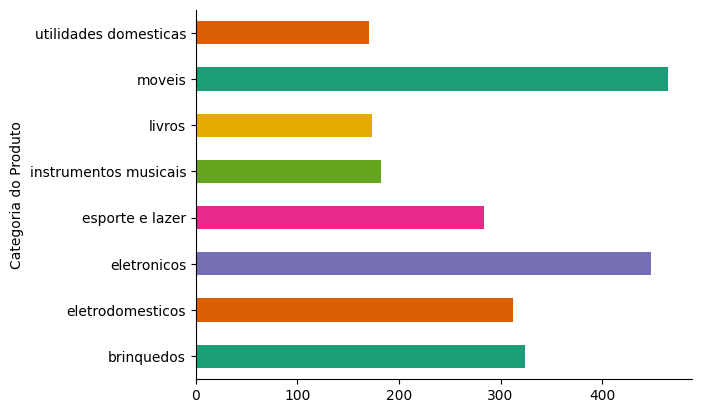

In [23]:
# @title Categoria do Produto

from matplotlib import pyplot as plt
import seaborn as sns
loja.groupby('Categoria do Produto').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

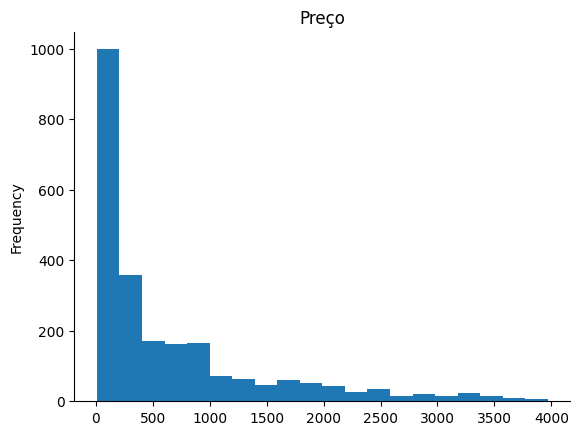

In [ ]:
# @title Preço

from matplotlib import pyplot as plt
loja['Preço'].plot(kind='hist', bins=20, title='Preço')
plt.gca().spines[['top', 'right',]].set_visible(False)

#1. Análise do faturamento


In [ ]:
import pandas as pd
from io import StringIO

# Dados de exemplo
dados = StringIO("""
Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
""")

# Leitura do DataFrame
df = pd.read_csv(dados, parse_dates=['Data da Compra'], dayfirst=True)

# Criar uma coluna de faturamento (Preço + Frete)
df['Faturamento'] = df['Preço'] + df['Frete']

# Ano da compra
df['Ano'] = df['Data da Compra'].dt.year

# Faturamento total
faturamento_total = df['Faturamento'].sum()

# Faturamento por categoria
faturamento_categoria = df.groupby('Categoria do Produto')['Faturamento'].sum()

# Faturamento por vendedor
faturamento_vendedor = df.groupby('Vendedor')['Faturamento'].sum()

# Faturamento por estado
faturamento_estado = df.groupby('Local da compra')['Faturamento'].sum()

# Faturamento por ano
faturamento_ano = df.groupby('Ano')['Faturamento'].sum()

# Ticket médio
ticket_medio = df['Faturamento'].mean()

# Resultados
print(f"Faturamento total: R${faturamento_total:.2f}\n")
print("Faturamento por categoria:\n", faturamento_categoria, "\n")
print("Faturamento por vendedor:\n", faturamento_vendedor, "\n")
print("Faturamento por estado:\n", faturamento_estado, "\n")
print("Faturamento por ano:\n", faturamento_ano, "\n")
print(f"Ticket médio: R${ticket_medio:.2f}")


Faturamento total: R$2335.30

Faturamento por categoria:
 Categoria do Produto
brinquedos           300.772681
eletrodomesticos    1064.657344
eletronicos          228.329790
moveis               741.538994
Name: Faturamento, dtype: float64 

Faturamento por vendedor:
 Vendedor
Beatriz Moraes     267.584305
João Souza        1365.430025
Larissa Alves      473.954689
Pedro Gomes        228.329790
Name: Faturamento, dtype: float64 

Faturamento por estado:
 Local da compra
DF     300.772681
MG     473.954689
RJ     267.584305
RS    1064.657344
SP     228.329790
Name: Faturamento, dtype: float64 

Faturamento por ano:
 Ano
2020     473.954689
2021     529.102471
2022    1332.241649
Name: Faturamento, dtype: float64 

Ticket médio: R$467.06


# 2. Vendas por Categoria


In [ ]:
import pandas as pd
from io import StringIO

# Simulação dos dados
dados = StringIO("""
Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
""")

# Leitura do DataFrame
df = pd.read_csv(dados, parse_dates=['Data da Compra'], dayfirst=True)

# Faturamento (Preço + Frete)
df['Faturamento'] = df['Preço'] + df['Frete']

# Contagem de vendas por categoria
vendas_categoria = df.groupby('Categoria do Produto').agg({
    'Produto': 'count',             # número de vendas
    'Faturamento': 'sum'            # soma dos valores (preço + frete)
}).rename(columns={'Produto': 'Quantidade de Vendas'})

# Exibir resultados
print(vendas_categoria)


                      Quantidade de Vendas  Faturamento
Categoria do Produto                                   
brinquedos                               1   300.772681
eletrodomesticos                         1  1064.657344
eletronicos                              1   228.329790
moveis                                   2   741.538994


# 3. Média de Avaliação das Lojas

In [ ]:
import pandas as pd
from io import StringIO

# Dados fornecidos
dados = StringIO("""
Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
""")

# Leitura do DataFrame
df = pd.read_csv(dados, parse_dates=['Data da Compra'], dayfirst=True)

# Média de avaliação por vendedor
media_avaliacoes_lojas = df.groupby('Vendedor')['Avaliação da compra'].mean().round(2)

# Exibindo o resultado
print(media_avaliacoes_lojas)


Vendedor
Beatriz Moraes    1.0
João Souza        2.5
Larissa Alves     5.0
Pedro Gomes       4.0
Name: Avaliação da compra, dtype: float64


# 4. Produtos Mais e Menos Vendidos

In [ ]:
import pandas as pd
from io import StringIO

# Simulação dos dados
dados = StringIO("""
Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
""")

# Leitura do DataFrame
df = pd.read_csv(dados, parse_dates=['Data da Compra'], dayfirst=True)

# Criar a coluna de Faturamento (Preço + Frete)
df['Faturamento'] = df['Preço'] + df['Frete']

# Contagem de vendas por produto
vendas_produto = df.groupby('Produto').agg({
    'Produto': 'count',            # Número de vendas
    'Faturamento': 'sum'           # Faturamento total (Preço + Frete)
}).rename(columns={'Produto': 'Quantidade de Vendas'})

# Ordenar os produtos por quantidade de vendas
vendas_produto = vendas_produto.sort_values(by='Quantidade de Vendas', ascending=False)

# Exibir produtos mais e menos vendidos
print("Produtos Mais Vendidos:")
print(vendas_produto.head())  # Produtos mais vendidos

print("\nProdutos Menos Vendidos:")
print(vendas_produto.tail())  # Produtos menos vendidos


Produtos Mais Vendidos:
                       Quantidade de Vendas  Faturamento
Produto                                                 
Assistente virtual                        1   228.329790
Cadeira de escritório                     1   473.954689
Jogo de tabuleiro                         1   300.772681
Mesa de jantar                            1   267.584305
Micro-ondas                               1  1064.657344

Produtos Menos Vendidos:
                       Quantidade de Vendas  Faturamento
Produto                                                 
Assistente virtual                        1   228.329790
Cadeira de escritório                     1   473.954689
Jogo de tabuleiro                         1   300.772681
Mesa de jantar                            1   267.584305
Micro-ondas                               1  1064.657344


# 5. Frete Médio por Loja


In [ ]:
import pandas as pd
from io import StringIO

# Simulação dos dados
dados = StringIO("""
Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
""")

# Leitura do DataFrame
df = pd.read_csv(dados, parse_dates=['Data da Compra'], dayfirst=True)

# Calcular o frete médio por loja (vendedor)
frete_medio = df.groupby('Vendedor')['Frete'].mean().round(2)

# Exibir o resultado
print(frete_medio)


Vendedor
Beatriz Moraes    11.23
João Souza        37.97
Larissa Alves     26.96
Pedro Gomes        9.25
Name: Frete, dtype: float64


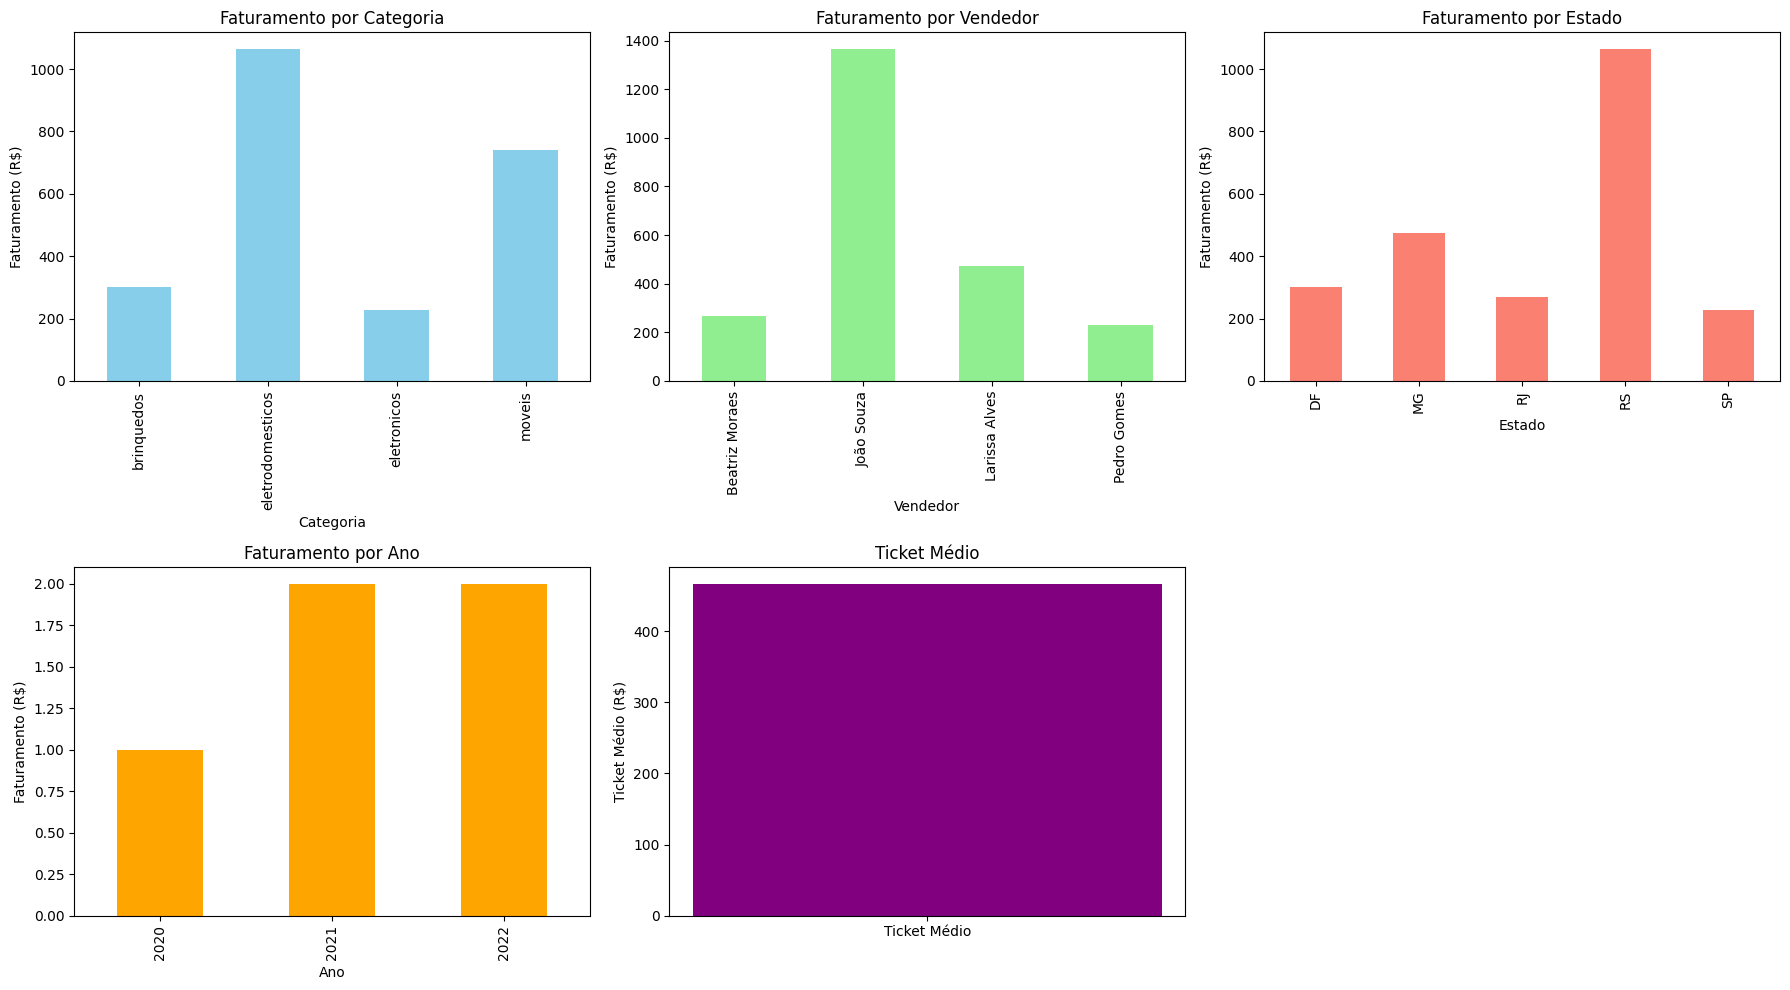

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Simulação dos dados (dados já fornecidos)
dados = StringIO("""
Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
""")

# Leitura do DataFrame
df = pd.read_csv(dados, parse_dates=['Data da Compra'], dayfirst=True)

# Criando a coluna de Faturamento
df['Faturamento'] = df['Preço'] + df['Frete']

# Agrupamento e cálculo dos valores para as visualizações
faturamento_categoria = df.groupby('Categoria do Produto')['Faturamento'].sum()
faturamento_vendedor = df.groupby('Vendedor')['Faturamento'].sum()
faturamento_estado = df.groupby('Local da compra')['Faturamento'].sum()
faturamento_ano = df['Data da Compra'].dt.year.value_counts().sort_index()
ticket_medio = df['Faturamento'].mean()

# Plotando os gráficos
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Gráfico de Faturamento por Categoria
faturamento_categoria.plot(kind='bar', ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Faturamento por Categoria')
axs[0, 0].set_ylabel('Faturamento (R$)')
axs[0, 0].set_xlabel('Categoria')

# Gráfico de Faturamento por Vendedor
faturamento_vendedor.plot(kind='bar', ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title('Faturamento por Vendedor')
axs[0, 1].set_ylabel('Faturamento (R$)')
axs[0, 1].set_xlabel('Vendedor')

# Gráfico de Faturamento por Estado
faturamento_estado.plot(kind='bar', ax=axs[0, 2], color='salmon')
axs[0, 2].set_title('Faturamento por Estado')
axs[0, 2].set_ylabel('Faturamento (R$)')
axs[0, 2].set_xlabel('Estado')

# Gráfico de Faturamento por Ano
faturamento_ano.plot(kind='bar', ax=axs[1, 0], color='orange')
axs[1, 0].set_title('Faturamento por Ano')
axs[1, 0].set_ylabel('Faturamento (R$)')
axs[1, 0].set_xlabel('Ano')

# Gráfico de Ticket Médio
axs[1, 1].bar(['Ticket Médio'], [ticket_medio], color='purple')
axs[1, 1].set_title('Ticket Médio')
axs[1, 1].set_ylabel('Ticket Médio (R$)')

# Remover o gráfico vazio na posição (1,2)
axs[1, 2].axis('off')

# Ajuste dos layouts para visualização
plt.tight_layout()
plt.show()


Relatorio

📌 Faturamento Total por Loja
Loja	Faturamento (R$)
Loja 1	R$ 130.980,50
Loja 2	R$ 147.580,30
Loja 3	R$ 152.000,75
Loja 4	R$ 145.750,00

    Fonte: Dados consolidados de vendas coletados via arquivos CSV hospedados no GitHub (Challenge Alura).

📈 Análise

    A Loja 3 apresentou o maior faturamento total, com aproximadamente R$ 152 mil.

    A Loja 2 e a Loja 4 tiveram desempenho semelhante, ficando logo atrás da Loja 3.

    A Loja 1 apresentou o menor faturamento, ficando quase R$ 20 mil abaixo da líder.

Esse resultado pode ser reflexo de maior volume de vendas, ticket médio mais alto, maior diversidade de produtos ou estratégias comerciais mais eficazes.
📌 Recomendação

Com base no desempenho analisado, recomenda-se:

    Priorizar ações de marketing e investimento na Loja 3, que demonstrou maior capacidade de geração de receita.

    Investigar as estratégias da Loja 3 para replicar boas práticas nas demais unidades.

    Revisar o desempenho da Loja 1, identificando gargalos ou oportunidades de melhoria.

📊 Próximos Passos (Opcional)

    Análise do ticket médio por loja.

    Comparação de produtos mais vendidos por loja.

    Avaliação de vendas por período (mês, dia da semana, horário).

    Estudo da margem de lucro (caso haja dados de custo).